In [79]:
from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
# from torch.nn import LogSoftmax
from torch import flatten

In [151]:
class LeNet(Module):
    def __init__(self):
        # call the parent constructor
        super(LeNet, self).__init__()

        # initialize first set of CONV => RELU => POOL layers
        self.conv1 = Conv2d(in_channels = 2, out_channels = 4,\
                            kernel_size = (2, 6), stride = (2,2))#2 - height, 6 - width 
        self.relu1 = ReLU()
        self.maxpool1 = MaxPool2d(kernel_size=(3, 3), stride=(3, 3)) #stride = step
        
        
        # initialize second set of CONV => RELU => POOL layers
        self.conv2 = Conv2d(in_channels=4, out_channels=8,\
                            kernel_size=(4, 4))
        self.relu2 = ReLU()
        self.maxpool2 = MaxPool2d(kernel_size=(3, 3), stride=(3, 3))
        
        
        # initialize third set of CONV => RELU => POOL layers
        self.conv3 = Conv2d(in_channels=8, out_channels=16,\
                            kernel_size=(3, 3))
        self.relu3 = ReLU()
        self.maxpool3 = MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        
        
        
        
        # initialize first (and only) set of FC => RELU layers
        self.fc1 = Linear(in_features=32, out_features=8)
        self.relu4 = ReLU()
        # initialize our softmax classifier
        self.fc2 = Linear(in_features=8, out_features=1)
#         self.logSoftmax = LogSoftmax(dim=1)
    def forward(self, x):
        # pass the input through our first set of CONV => RELU =>
        # POOL layers
#         print(x)
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)

        # pass the output from the previous layer through the second
        # set of CONV => RELU => POOL layers
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)

        # pass the output from the previous layer through the second
        # set of CONV => RELU => POOL layers
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.maxpool3(x)


        # flatten the output from the previous layer and pass it
        # through our only set of FC => RELU layers

        x = flatten(x, 1)
        x = self.fc1(x)
        x = self.relu4(x)

        # pass the output to our softmax classifier to get our output
        # predictions
        output = self.fc2(x)
    #     output = self.logSoftmax(x)
        # return the output predictions
        return output

In [152]:
class LeNet(Module):
    def __init__(self):
        # call the parent constructor
        super(LeNet, self).__init__()

        # initialize first set of CONV => RELU => POOL layers
        self.conv1 = Conv2d(in_channels = 2, out_channels = 4,\
                            kernel_size = (4, 10), stride = (4,5))#2 - height, 6 - width 
        self.relu1 = ReLU()
        self.maxpool1 = MaxPool2d(kernel_size=(4, 3), stride=(4, 3)) #stride = step
        
        
        # initialize first (and only) set of FC => RELU layers
        self.fc1 = Linear(in_features=48, out_features=8)
        self.relu2 = ReLU()
        self.fc2 = Linear(in_features=8, out_features=3)
        self.relu3 = ReLU()
        # initialize our softmax classifier
        self.fc3 = Linear(in_features=3, out_features=1)
#         self.logSoftmax = LogSoftmax(dim=1)
    def forward(self, x):
        # pass the input through our first set of CONV => RELU =>
        # POOL layers
#         print(x)
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        
        x = flatten(x, 1)
        
        
        
        x = self.fc1(x)
        x = self.relu2(x)

        x = self.fc2(x)
        x = self.relu3(x)

        output = self.fc3(x)
    #     output = self.logSoftmax(x)
        # return the output predictions
        return output

In [153]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
# matplotlib.use("Agg")

# from sklearn.metrics import classification_report

import glob
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split
from torchvision.transforms import ToTensor

from torch.optim import Adam
from torch import nn
import matplotlib.pyplot as plt
import argparse
import torch
import time

In [154]:
# set the device we will be using to train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [155]:
class CustomDataset(Dataset):
    def __init__(self):
        self.data = []

        target_954 = np.load('data_segment/Y_natur_954.npz')
        for j in range(3000):
            self.data.append(["data_segment/natur_X/954_" + str(j) + '.npz',target_954['arr_0'][j]])
#         print(self.data)

        target_9_7 = np.load('data_segment/Y_natur_9_7.npz')
#         print(target_9_7['arr_0'])
        for j in range(3000):
            self.data.append(["data_segment/natur_X/9_7_" + str(j) + '.npz',target_9_7['arr_0'][j]])

        
        target_Air = np.load('data_segment/Y_natur_Air.npz')
#         print(target_Air['arr_0'])
        for j in range(3000):
            self.data.append(["data_segment/natur_X/Air_" + str(j) + '.npz',target_Air['arr_0'][j]])
        
        temp = np.load('data_segment/natur_X/954_0.npz')
        self.img_dim = temp['arr_0'].shape  
        print(self.img_dim)
        
        
    def __len__(self):
        return len(self.data)    
    
    
    def __getitem__(self, idx):
        img_path, target = self.data[idx]
        
        img = np.load(img_path)
        img_tensor = torch.from_numpy(img['arr_0'])
        
        target_tensor = torch.tensor(target)
#         print(target_tensor, target)
        
#         img_tensor = img_tensor.permute(2, 0, 1)
#         class_id = torch.tensor([class_id])
        
        return img_tensor, target_tensor

In [156]:
data = CustomDataset()

print(len(data))

(2, 64, 50)
9000


In [158]:
print(data[1][0].size())
print(data[1][0].type())
print(data[1][1].type())
print(data[1][1], data[1][1].item())
# print(data[1][0])


torch.Size([2, 64, 50])
torch.DoubleTensor
torch.DoubleTensor
tensor(0.0319, dtype=torch.float64) 0.03186977247219236


In [159]:
Train_split = 0.7
Val_split = 0.15
Test_split = 0.15

(trainData, valData, testData) = random_split(data, [Train_split, Val_split, Test_split],\
                                              generator=torch.Generator().manual_seed(42))

In [160]:
print(len(trainData))
print(len(valData))
print(len(testData))

6300
1350
1350


In [161]:
BATCH_SIZE = 32
trainDataLoader = DataLoader(trainData, shuffle=True, batch_size=BATCH_SIZE)
valDataLoader = DataLoader(valData, batch_size=BATCH_SIZE)
testDataLoader = DataLoader(testData, batch_size=BATCH_SIZE)



# print(testDataLoader.dataset[0])

# calculate steps per epoch for training and validation set
trainSteps = len(trainDataLoader.dataset) // BATCH_SIZE
print(trainSteps)

valSteps = len(valDataLoader.dataset) // BATCH_SIZE
print(valSteps)


# print(trainDataLoader.dataset)
# print(trainDataLoader.dataset[1])
# print(trainDataLoader.dataset[1][0].type())
# print(trainDataLoader.dataset[1][1])

196
42


In [166]:
# define training hyperparameters
INIT_LR = 0.001

# initialize the LeNet model
print("[INFO] initializing the LeNet model...")

model = LeNet().to(device)
model.type(torch.cuda.DoubleTensor)


print(model)
# initialize our optimizer and loss function
opt = Adam(model.parameters(), lr=INIT_LR)

lossMSE = nn.MSELoss()
# initialize a dictionary to store training history
H = {"train_loss": [],"val_loss": []}


[INFO] initializing the LeNet model...
LeNet(
  (conv1): Conv2d(2, 4, kernel_size=(4, 10), stride=(4, 5))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=(4, 3), stride=(4, 3), padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=48, out_features=8, bias=True)
  (relu2): ReLU()
  (fc2): Linear(in_features=8, out_features=3, bias=True)
  (relu3): ReLU()
  (fc3): Linear(in_features=3, out_features=1, bias=True)
)


In [167]:
EPOCHS = 1000
print("[INFO] training the network...")


startTime = time.time()
# loop over our epochs
for e in range(0, EPOCHS):
    # set the model in training mode
    model.train()
    # initialize the total training and validation loss
    totalTrainLoss = 0
    totalValLoss = 0
   
    # loop over the training set
    for id_batch, (x, y) in enumerate(trainDataLoader):
#         print(id_batch)
#         print(y)
        # send the input to the device
        (x, y) = (x.to(device), y.to(device))
#         print(y.size(), y.type())
#         print(x.size(), x.type())
#         print(x)
        # perform a forward pass and calculate the training loss
        pred = model(x)
#         print(pred)

        loss = lossMSE(pred, y)
        # zero out the gradients, perform the backpropagation step,
        # and update the weights
        opt.zero_grad()
        loss.backward()
        opt.step()
        # add the loss to the total training loss so far and
        totalTrainLoss += loss
    # switch off autograd for evaluation
    with torch.no_grad():
        # set the model in evaluation mode
        model.eval()
        # loop over the validation set
        for (x, y) in valDataLoader:
            # send the input to the device
            (x, y) = (x.to(device), y.to(device))
            # make the predictions and calculate the validation loss
            pred = model(x)
            totalValLoss += lossMSE(pred, y)

    # calculate the average training and validation loss
    avgTrainLoss = totalTrainLoss / trainSteps
    avgValLoss = totalValLoss / valSteps

    # update our training history
    H["train_loss"].append(avgTrainLoss.cpu().detach().numpy())
    H["val_loss"].append(avgValLoss.cpu().detach().numpy())
    
    # print the model training and validation information
    print("[INFO] EPOCH: {}/{}".format(e + 1, EPOCHS))
    print("Train loss: {:.6f}, Val loss: {:.6f}".format(
        avgTrainLoss, avgValLoss))
# finish measuring how long training took
endTime = time.time()
print("[INFO] total time taken to train the model: \
        {:.2f}s".format(endTime - startTime))

[INFO] training the network...
[INFO] EPOCH: 1/1000
Train loss: 634244408750.174805, Val loss: 1802674406.604646
[INFO] EPOCH: 2/1000
Train loss: 971116383.209172, Val loss: 521576400.679469
[INFO] EPOCH: 3/1000
Train loss: 382461134.446445, Val loss: 232643548.651361
[INFO] EPOCH: 4/1000
Train loss: 204018094.042604, Val loss: 131053008.638063
[INFO] EPOCH: 5/1000
Train loss: 121418420.192680, Val loss: 82056544.798020
[INFO] EPOCH: 6/1000
Train loss: 70874601.375135, Val loss: 55067712.851525
[INFO] EPOCH: 7/1000
Train loss: 48097456.166298, Val loss: 39013192.240889
[INFO] EPOCH: 8/1000
Train loss: 33993820.734664, Val loss: 28397156.034711
[INFO] EPOCH: 9/1000
Train loss: 24949802.912529, Val loss: 21312721.246306
[INFO] EPOCH: 10/1000
Train loss: 18896186.468332, Val loss: 16268868.863772
[INFO] EPOCH: 11/1000
Train loss: 14664987.342819, Val loss: 12666710.197056
[INFO] EPOCH: 12/1000
Train loss: 11572934.457703, Val loss: 10044826.525310
[INFO] EPOCH: 13/1000
Train loss: 9296638

[INFO] EPOCH: 121/1000
Train loss: 0.008039, Val loss: 0.007477
[INFO] EPOCH: 122/1000
Train loss: 0.006587, Val loss: 0.006074
[INFO] EPOCH: 123/1000
Train loss: 0.005297, Val loss: 0.004839
[INFO] EPOCH: 124/1000
Train loss: 0.004174, Val loss: 0.003777
[INFO] EPOCH: 125/1000
Train loss: 0.003221, Val loss: 0.002887
[INFO] EPOCH: 126/1000
Train loss: 0.002434, Val loss: 0.002163
[INFO] EPOCH: 127/1000
Train loss: 0.001803, Val loss: 0.001591
[INFO] EPOCH: 128/1000
Train loss: 0.001313, Val loss: 0.001154
[INFO] EPOCH: 129/1000
Train loss: 0.000947, Val loss: 0.000834
[INFO] EPOCH: 130/1000
Train loss: 0.000685, Val loss: 0.000608
[INFO] EPOCH: 131/1000
Train loss: 0.000504, Val loss: 0.000457
[INFO] EPOCH: 132/1000
Train loss: 0.000386, Val loss: 0.000360
[INFO] EPOCH: 133/1000
Train loss: 0.000313, Val loss: 0.000302
[INFO] EPOCH: 134/1000
Train loss: 0.000271, Val loss: 0.000268
[INFO] EPOCH: 135/1000
Train loss: 0.000247, Val loss: 0.000251
[INFO] EPOCH: 136/1000
Train loss: 0.000

[INFO] EPOCH: 250/1000
Train loss: 0.000227, Val loss: 0.000234
[INFO] EPOCH: 251/1000
Train loss: 0.000227, Val loss: 0.000234
[INFO] EPOCH: 252/1000
Train loss: 0.000227, Val loss: 0.000237
[INFO] EPOCH: 253/1000
Train loss: 0.000227, Val loss: 0.000240
[INFO] EPOCH: 254/1000
Train loss: 0.000228, Val loss: 0.000235
[INFO] EPOCH: 255/1000
Train loss: 0.000227, Val loss: 0.000235
[INFO] EPOCH: 256/1000
Train loss: 0.000227, Val loss: 0.000235
[INFO] EPOCH: 257/1000
Train loss: 0.000227, Val loss: 0.000234
[INFO] EPOCH: 258/1000
Train loss: 0.000228, Val loss: 0.000236
[INFO] EPOCH: 259/1000
Train loss: 0.000227, Val loss: 0.000234
[INFO] EPOCH: 260/1000
Train loss: 0.000228, Val loss: 0.000234
[INFO] EPOCH: 261/1000
Train loss: 0.000228, Val loss: 0.000239
[INFO] EPOCH: 262/1000
Train loss: 0.000228, Val loss: 0.000235
[INFO] EPOCH: 263/1000
Train loss: 0.000227, Val loss: 0.000243
[INFO] EPOCH: 264/1000
Train loss: 0.000228, Val loss: 0.000236
[INFO] EPOCH: 265/1000
Train loss: 0.000

[INFO] EPOCH: 379/1000
Train loss: 0.000227, Val loss: 0.000240
[INFO] EPOCH: 380/1000
Train loss: 0.000228, Val loss: 0.000234
[INFO] EPOCH: 381/1000
Train loss: 0.000227, Val loss: 0.000235
[INFO] EPOCH: 382/1000
Train loss: 0.000228, Val loss: 0.000237
[INFO] EPOCH: 383/1000
Train loss: 0.000228, Val loss: 0.000234
[INFO] EPOCH: 384/1000
Train loss: 0.000228, Val loss: 0.000234
[INFO] EPOCH: 385/1000
Train loss: 0.000227, Val loss: 0.000237
[INFO] EPOCH: 386/1000
Train loss: 0.000228, Val loss: 0.000236
[INFO] EPOCH: 387/1000
Train loss: 0.000228, Val loss: 0.000234
[INFO] EPOCH: 388/1000
Train loss: 0.000227, Val loss: 0.000236
[INFO] EPOCH: 389/1000
Train loss: 0.000227, Val loss: 0.000234
[INFO] EPOCH: 390/1000
Train loss: 0.000228, Val loss: 0.000237
[INFO] EPOCH: 391/1000
Train loss: 0.000228, Val loss: 0.000234
[INFO] EPOCH: 392/1000
Train loss: 0.000228, Val loss: 0.000234
[INFO] EPOCH: 393/1000
Train loss: 0.000228, Val loss: 0.000234
[INFO] EPOCH: 394/1000
Train loss: 0.000

[INFO] EPOCH: 508/1000
Train loss: 0.000227, Val loss: 0.000234
[INFO] EPOCH: 509/1000
Train loss: 0.000228, Val loss: 0.000237
[INFO] EPOCH: 510/1000
Train loss: 0.000228, Val loss: 0.000235
[INFO] EPOCH: 511/1000
Train loss: 0.000227, Val loss: 0.000235
[INFO] EPOCH: 512/1000
Train loss: 0.000227, Val loss: 0.000238
[INFO] EPOCH: 513/1000
Train loss: 0.000227, Val loss: 0.000239
[INFO] EPOCH: 514/1000
Train loss: 0.000227, Val loss: 0.000234
[INFO] EPOCH: 515/1000
Train loss: 0.000228, Val loss: 0.000235
[INFO] EPOCH: 516/1000
Train loss: 0.000228, Val loss: 0.000244
[INFO] EPOCH: 517/1000
Train loss: 0.000227, Val loss: 0.000234
[INFO] EPOCH: 518/1000
Train loss: 0.000227, Val loss: 0.000234
[INFO] EPOCH: 519/1000
Train loss: 0.000227, Val loss: 0.000237
[INFO] EPOCH: 520/1000
Train loss: 0.000227, Val loss: 0.000238
[INFO] EPOCH: 521/1000
Train loss: 0.000228, Val loss: 0.000234
[INFO] EPOCH: 522/1000
Train loss: 0.000227, Val loss: 0.000234
[INFO] EPOCH: 523/1000
Train loss: 0.000

[INFO] EPOCH: 637/1000
Train loss: 0.000228, Val loss: 0.000234
[INFO] EPOCH: 638/1000
Train loss: 0.000228, Val loss: 0.000234
[INFO] EPOCH: 639/1000
Train loss: 0.000227, Val loss: 0.000235
[INFO] EPOCH: 640/1000
Train loss: 0.000228, Val loss: 0.000241
[INFO] EPOCH: 641/1000
Train loss: 0.000228, Val loss: 0.000236
[INFO] EPOCH: 642/1000
Train loss: 0.000228, Val loss: 0.000237
[INFO] EPOCH: 643/1000
Train loss: 0.000228, Val loss: 0.000240
[INFO] EPOCH: 644/1000
Train loss: 0.000228, Val loss: 0.000235
[INFO] EPOCH: 645/1000
Train loss: 0.000227, Val loss: 0.000235
[INFO] EPOCH: 646/1000
Train loss: 0.000227, Val loss: 0.000236
[INFO] EPOCH: 647/1000
Train loss: 0.000228, Val loss: 0.000234
[INFO] EPOCH: 648/1000
Train loss: 0.000227, Val loss: 0.000236
[INFO] EPOCH: 649/1000
Train loss: 0.000229, Val loss: 0.000236
[INFO] EPOCH: 650/1000
Train loss: 0.000228, Val loss: 0.000234
[INFO] EPOCH: 651/1000
Train loss: 0.000228, Val loss: 0.000235
[INFO] EPOCH: 652/1000
Train loss: 0.000

[INFO] EPOCH: 766/1000
Train loss: 0.000228, Val loss: 0.000234
[INFO] EPOCH: 767/1000
Train loss: 0.000228, Val loss: 0.000235
[INFO] EPOCH: 768/1000
Train loss: 0.000228, Val loss: 0.000235
[INFO] EPOCH: 769/1000
Train loss: 0.000227, Val loss: 0.000234
[INFO] EPOCH: 770/1000
Train loss: 0.000227, Val loss: 0.000239
[INFO] EPOCH: 771/1000
Train loss: 0.000227, Val loss: 0.000241
[INFO] EPOCH: 772/1000
Train loss: 0.000228, Val loss: 0.000235
[INFO] EPOCH: 773/1000
Train loss: 0.000228, Val loss: 0.000235
[INFO] EPOCH: 774/1000
Train loss: 0.000228, Val loss: 0.000235
[INFO] EPOCH: 775/1000
Train loss: 0.000228, Val loss: 0.000234
[INFO] EPOCH: 776/1000
Train loss: 0.000227, Val loss: 0.000235
[INFO] EPOCH: 777/1000
Train loss: 0.000226, Val loss: 0.000242
[INFO] EPOCH: 778/1000
Train loss: 0.000229, Val loss: 0.000236
[INFO] EPOCH: 779/1000
Train loss: 0.000227, Val loss: 0.000235
[INFO] EPOCH: 780/1000
Train loss: 0.000228, Val loss: 0.000234
[INFO] EPOCH: 781/1000
Train loss: 0.000

[INFO] EPOCH: 895/1000
Train loss: 0.000227, Val loss: 0.000235
[INFO] EPOCH: 896/1000
Train loss: 0.000228, Val loss: 0.000234
[INFO] EPOCH: 897/1000
Train loss: 0.000228, Val loss: 0.000237
[INFO] EPOCH: 898/1000
Train loss: 0.000227, Val loss: 0.000235
[INFO] EPOCH: 899/1000
Train loss: 0.000227, Val loss: 0.000234
[INFO] EPOCH: 900/1000
Train loss: 0.000227, Val loss: 0.000235
[INFO] EPOCH: 901/1000
Train loss: 0.000228, Val loss: 0.000242
[INFO] EPOCH: 902/1000
Train loss: 0.000228, Val loss: 0.000236
[INFO] EPOCH: 903/1000
Train loss: 0.000227, Val loss: 0.000238
[INFO] EPOCH: 904/1000
Train loss: 0.000228, Val loss: 0.000234
[INFO] EPOCH: 905/1000
Train loss: 0.000228, Val loss: 0.000235
[INFO] EPOCH: 906/1000
Train loss: 0.000227, Val loss: 0.000236
[INFO] EPOCH: 907/1000
Train loss: 0.000228, Val loss: 0.000236
[INFO] EPOCH: 908/1000
Train loss: 0.000227, Val loss: 0.000234
[INFO] EPOCH: 909/1000
Train loss: 0.000229, Val loss: 0.000235
[INFO] EPOCH: 910/1000
Train loss: 0.000

In [168]:
# we can now evaluate the network on the test set
print("[INFO] evaluating network...")
# turn off autograd for testing evaluation
with torch.no_grad():
    # set the model in evaluation mode
    model.eval()

    # initialize a list to store our predictions
    preds = []
    # loop over the test set
    for (x, y) in testDataLoader:
        # send the input to the device
        x = x.to(device)
        # make the predictions and add them to the list
        pred = model(x)
        preds.extend(pred.argmax(axis=1).cpu().numpy())


[INFO] evaluating network...


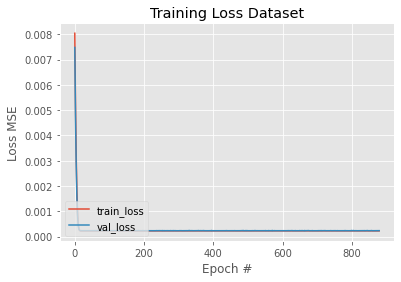

In [176]:
# plot the training loss and accuracy
# plt.style.use("ggplot")
plt.figure()
plt.plot(H["train_loss"][120:], label="train_loss")
plt.plot(H["val_loss"][120:], label="val_loss")


plt.title("Training Loss Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss MSE")
plt.legend(loc="lower left")
# plt.savefig(args["plot"])
# serialize the model to disk
# torch.save(model, args["model"])

In [190]:
from torchmetrics import MeanSquaredError
mean_squared_error = MeanSquaredError()
        
with torch.no_grad():
    # set the model in evaluation mode
    model.eval()

    # initialize a list to store our predictions
    preds = []
    # loop over the test set
    for (x, y) in trainDataLoader:
        # send the input to the device
        x = x.to(device)
        # make the predictions and add them to the list
        pred = model(x).flatten()
        print(y)
        print(pred)
        print(mean_squared_error(pred, y))
        
        
        
#         print(y-pred)
#         print(y.numpy(), (pred.flatten().cpu()).numpy())
        plt.scatter(np.log(y.numpy()), (pred.flatten().cpu()).numpy(), color = 'black')
        preds.extend(pred.argmax(axis=1).cpu().numpy())
        

        
        

ModuleNotFoundError: No module named 'torchmetrics'